# Background and Context:
Product categorization also referred to as product classification, is a field of study within natural language processing (NLP). It is also one of the biggest challenges for e-commerce companies. With the advancement of AI technology, researchers have been applying machine learning to product categorization problems.
Product categorization is the placement and organization of products into their respective categories. In that sense, it sounds simple: choose the correct department for a product. However, this process is complicated by the sheer volume of products on many e-commerce platforms. Furthermore, many products could belong to multiple categories.
There are many reasons why product categorization is important for e-commerce and marketing. Through the accurate classification of your products, you can increase conversion rates, strengthen your search engine, and improve your site’s Google ranking.

A well-built product taxonomy allows customers to find what they are looking for quickly and easily. Making your site easy to navigate is one of the most important elements of your UX and will lead to higher conversion rates.

Correctly categorizing products allows your search engine to fetch products quicker. As a result, you create a quicker and more accurate search engine. Once you have a strong product taxonomy in place, this will allow you to create the relevant landing pages for your products. In turn, Google and other search engines will be able to index your site and your products more easily. In the end, this allows your products to rank higher on search engines, increasing the chance that customers find your site.

To help merchants choose the correct category, Amazon and other e-commerce companies have automated product categorization tools available. After simply inputting the title or a few words about the product, the system can automatically choose the correct category for you.

# Objective:
Develop an LSTM that can process the text data descriptions and correctly label them in their corresponding categories.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Importing reprocessing libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from keras.models import Sequential
import tensorflow
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
data = pd.read_csv('/content/drive/My Drive/NLP Project/ecommerceDataset.csv')

In [4]:
data.head()

,Label,Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories"
1,Household,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc"
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail"
4,Household,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp."


In [5]:
data.shape

(50424, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [7]:
labels = data['Label'].unique()

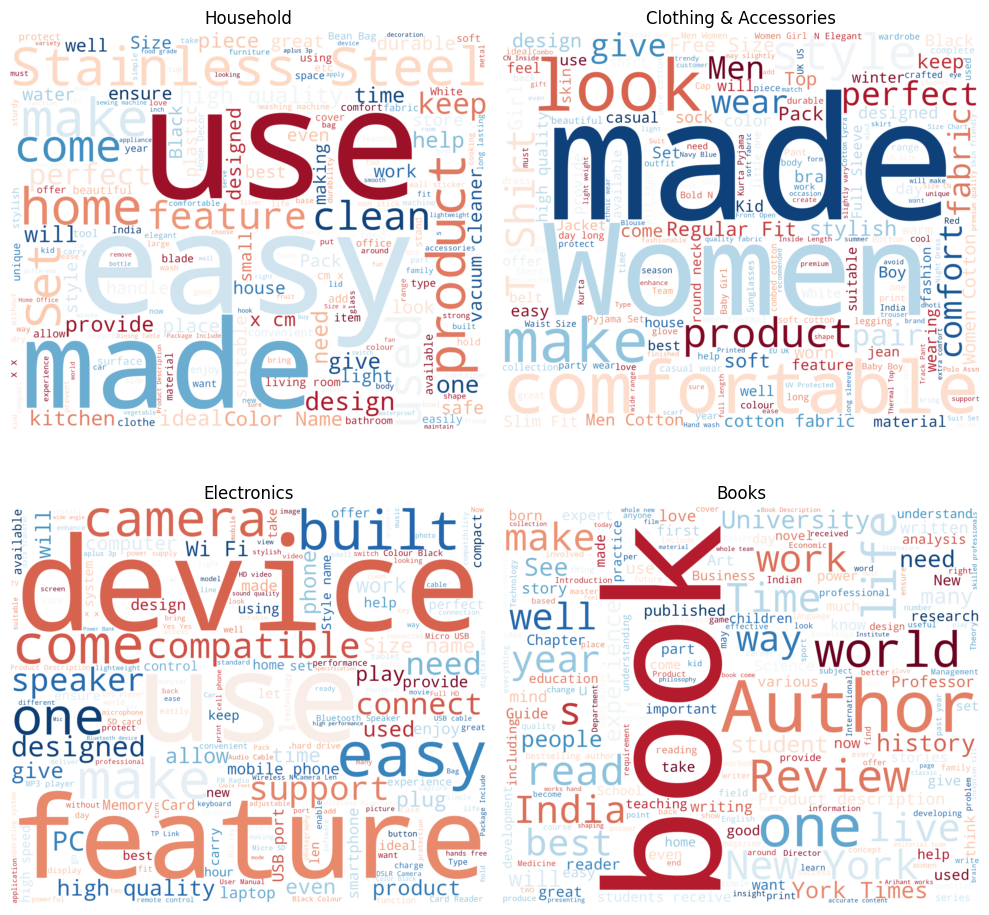

In [8]:
# Creating word clouds for each label

# Calculating the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# Loop through each label and create a word cloud in a subplot
for idx, label in enumerate(labels):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Extracting the descriptions
    description = data[data['Label'] == label]

    # Joining all the descriptions to a single string list
    try:
      words = ' '.join(str(desc) for desc in description['Text'])
      cleaned_word = " ".join([word for word in words.split()])

      # creating the wordcloud using the WordCloud() method
      wordcloud = WordCloud(stopwords=STOPWORDS,
                            colormap='RdBu',
                            background_color='white',
                            width=3000,
                            height=2500
                            ).generate(cleaned_word)

      # Displaying the WordCloud as a subplot
      axes[row_idx, col_idx].imshow(wordcloud, interpolation='bilinear')
      axes[row_idx, col_idx].set_title(label)
      axes[row_idx, col_idx].axis('off')
    except Exception as e:
        print(f"Error processing label '{label}': {e}")
        print(description['Text'])  # Print the problematic description

plt.tight_layout()
plt.show()

We see clear distinctive words per category:

*   Household has a far greater frequency for words as: easy, made, use
*   Clothing accessories has a much higher frequency for words such as: made, women, etcetera
*   Electronics show a higher usage of words such as: device, feature, use, etcetera
*   Books have a higher frequency of words such as Author, book, etcetera

We can already expect false labeling to come from words such as use and made that get repeated frequently across multiple labels.



In [9]:
print('The Ratio of labels is:')
for label in labels:
  percent = 100*(len(data[data['Label']==label])/len(data['Label']))
  print(f'{label} consists of {percent:.1f}% of the labels')
  print()



The Ratio of labels is:
Household consists of 38.3% of the labels

Clothing & Accessories consists of 17.2% of the labels

Electronics consists of 21.1% of the labels

Books consists of 23.4% of the labels



We notice that the labels are fairly well distributed among the four labels except with Household having a 50% higher frequency over Clothing and Accessories.

In [10]:
# Text pre-processing function
def preprocess_text(text):
    # Make sure everything is as a string
    text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits using regular expression
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens back to form a cleaned sentence
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text

# Apply the pre-processing function to the 'text' column
data['cleaned_Text'] = data['Text'].apply(preprocess_text)



In [11]:
data.head()

,Label,Text,cleaned_Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories",styleys wrought iron coat rack hanger creative fashion bedroom hanging clothes shelves wrought iron racks standing coat rack black color name black styleys coat stand great homes rooms limited space one standing rack takes less space compared drawers cupboards easy guests keep items especially bags scarves visiting always keep eye easily grab leaving makes smart cor piece home room occupied stands show stylish handbags accessories hangman achievement medals dimensions cm x cm x cm weight kg material steel colour white black pink hook straight pegs suitable hang coats clothes scarves handbags hats accessories
1,Household,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc",cuisinart cco bkn deluxe electric opener black size none color name black style convenience power come together cuisinart electric open chrome accents elegant contours fits nicely modern countertop appliances easy single touc
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.,anchor penta amp way switch white pack anchor penta amp way switch white pack comes spark shield concealed terminals silver cadmium contacts ip protection captive screw
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail",proline men track jacket proline woven polyester high neck wind cheater colour blocked detail
4,Household,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 time

In [12]:
# Creating the tokenizer with 700 vocab size since it seems to be a good rule of thumb
tokenizer = Tokenizer(num_words = 700, split = ' ')

tokenizer.fit_on_texts(data['cleaned_Text'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(data['cleaned_Text'].values)

# Padding the sequences
X = pad_sequences(X)

In [13]:
# Setting up the model
model = Sequential()

model.add(Embedding(700, 120, input_length = X.shape[1]))

model.add(SpatialDropout1D(0.2))

model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(len(labels), activation = 'softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1191, 120)         84000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1191, 120)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               162600    
                                                                 
 dense (Dense)               (None, 4)                 604       
                                                                 
Total params: 247,204
Trainable params: 247,204
Non-trainable params: 0
_________________________________________________________________


We see that we have a total of 247,204 parameters, all of which are trainable.

In [15]:
# creating the target feature
y = pd.get_dummies(data['Label'])
print(y)
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# specifying the batch size
batch_size = 32

# fitting the model on the training data with 10 epochs
his = model.fit(X_train, y_train, epochs = 2, batch_size = batch_size, verbose = 'auto')

# NOTE: Given the time it took to run each epoch (2 hrs), I will continue the analysis with only 2,
# despite being aware that doing more epochs would have increased the performance even more.
# There was also the issue of maximizing the GoogleCollab runtime when I attempted higher number of epochs.

       Books  Clothing & Accessories  Electronics  Household
0          0                       0            0          1
1          0                       0            0          1
2          0                       0            0          1
3          0                       1            0          0
4          0                       0            0          1
...      ...                     ...          ...        ...
50419      1                       0            0          0
50420      0                       1            0          0
50421      0                       1            0          0
50422      1                       0            0          0
50423      0                       0            0          1

[50424 rows x 4 columns]
Epoch 1/2
1103/1103 [==============================] - 5238s 5s/step - loss: 0.3739 - accuracy: 0.8859
Epoch 2/2
1103/1103 [==============================] - 5174s 5s/step - loss: 0.2492 - accuracy: 0.9322


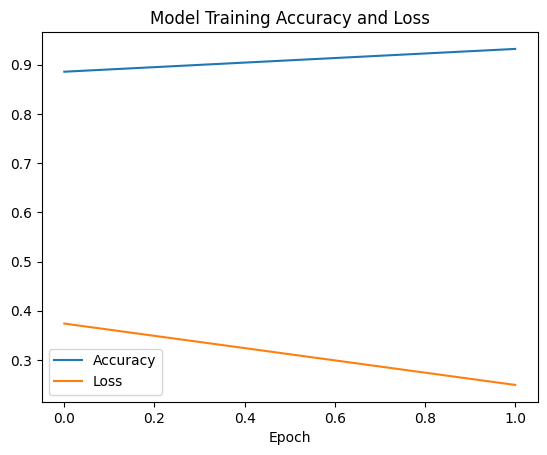

In [16]:
plt.plot(his.history['accuracy'], label='Accuracy')
plt.plot(his.history['loss'], label='Loss')

plt.title('Model Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test,y_test)


473/473 [==============================] - 318s 671ms/step - loss: 0.2424 - accuracy: 0.9339


[0.24240387976169586, 0.9338974356651306]

473/473 [==============================] - 326s 689ms/step


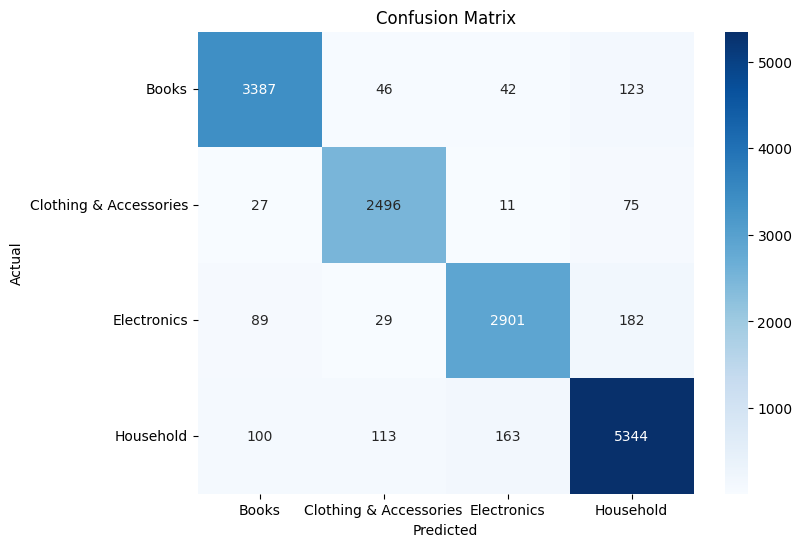

In [21]:
# Convert class labels to numerical indices
label_to_index = {label: index for index, label in enumerate(['Books', 'Clothing & Accessories', 'Electronics', 'Household'])}

y_test_indices = y_test.dot(pd.Series(label_to_index))  # Convert one-hot to indices
y_predict = model.predict(X_test)
y_predict_indices = np.argmax(y_predict, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(y_test_indices, y_predict_indices)

# Plot confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Print classification report
report = classification_report(y_test_indices, y_predict_indices, target_names=labels)
print(report)

                        precision    recall  f1-score   support

             Household       0.94      0.94      0.94      3598
Clothing & Accessories       0.93      0.96      0.94      2609
           Electronics       0.93      0.91      0.92      3201
                 Books       0.93      0.93      0.93      5720

              accuracy                           0.93     15128
             macro avg       0.93      0.93      0.93     15128
          weighted avg       0.93      0.93      0.93     15128



So we can see that with just 2 epochs, the designed LSTM can reach accuracy of 94% on average for labeling the items. Given the initial slope and other trials I would suspect that this model would reach 96-97% performance accuracy.